Fit a neural network to the Default data. Use a single hidden layer
with 10 units, and dropout regularization. Have a look at Labs 10.9.1–
10.9.2 for guidance. Compare the classification performance of your
model with that of linear logistic regression

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from ISLP import load_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

default = load_data("Default")

default["student"] = default["student"].replace({"No":0, "Yes":1})

label_encoder = LabelEncoder()
default["default"] = label_encoder.fit_transform(default["default"])

X = default.drop(columns=["default"])
y = default["default"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([tf.keras.layers.Dense(10, activation="relu", input_shape=(X_train.shape[1],)), tf.keras.layers.Dropout(0.2), tf.keras.layers.Dense(1, activation="sigmoid")])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred_nn = (model.predict(X_test) > 0.5).astype(int)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy of Neural Network: {accuracy_nn:.4f}")

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of Logistic Regression: {accuracy_lr:.4f}")

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3501 - accuracy: 0.8992 - val_loss: 0.1941 - val_accuracy: 0.9655
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.1738 - accuracy: 0.9654 - val_loss: 0.1332 - val_accuracy: 0.9655
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.1395 - accuracy: 0.9655 - val_loss: 0.1144 - val_accuracy: 0.9655
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.1231 - accuracy: 0.9665 - val_loss: 0.1058 - val_accuracy: 0.9655
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.9682 - val_loss: 0.1002 - val_accuracy: 0.9665
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.1052 - accuracy: 0.9682 - val_loss: 0.0963 - val_accuracy: 0.9655
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 0.9696 - val_loss: 0.0935 - val_accuracy: 0.9645
Epoch 

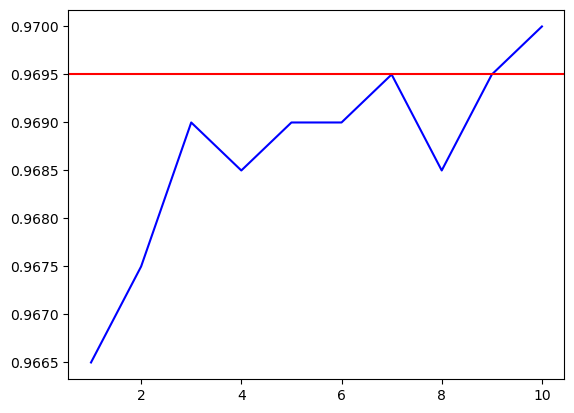

In [18]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)

accuracy_nn = history.history["val_accuracy"]

epochs = range(1, len(accuracy_nn) + 1)
plt.plot(epochs, accuracy_nn, "b")
plt.axhline(y=accuracy_lr, color="r")
plt.show()